<a href="https://colab.research.google.com/github/DJ-Adams/Data-Visualization/blob/main/Time_Seriesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQcpVvVioO23cndDwr1UmKhndrSq6ES6ZUKZ4fkBBqIAavd1_coVPO_yeOye-Ub-cAWlkX3psJvOU8o/pub?output=csv"
df = pd.read_csv(url)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.5,0.000000,1015.666667
1,2013-01-02,7.400000,92.0,2.980000,1017.800000
2,2013-01-03,7.166667,87.0,4.633333,1018.666667


In [ ]:
#Add a datetime column based on the string in the "date" column
df['datetime'] = pd.to_datetime(df['date'])
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   object        
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
 5   datetime      1462 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.7+ KB


,date,meantemp,humidity,wind_speed,meanpressure,datetime
0,2013-01-01,10.000000,84.5,0.000000,1015.666667,2013-01-01
1,2013-01-02,7.400000,92.0,2.980000,1017.800000,2013-01-02
2,2013-01-03,7.166667,87.0,4.633333,1018.666667,2013-01-03


In [ ]:
## preview first row from the date column (string)
df.loc[0,'date']

'2013-01-01'

In [ ]:
## preview first row from the datetime column (datetime64[ns])
df.loc[0,'datetime']

Timestamp('2013-01-01 00:00:00')

In [ ]:
## demonstrate format code
fmt = "%B %d, %Y"
df.loc[0,'datetime'].strftime(fmt)

'January 01, 2013'

Here we will apply the desired format and create an entire new column:

In [ ]:
df['datetime_fmt'] = df['datetime'].dt.strftime(fmt)
df['datetime_fmt']

0        January 01, 2013
1        January 02, 2013
2        January 03, 2013
3        January 04, 2013
4        January 05, 2013
              ...        
1457    December 28, 2016
1458    December 29, 2016
1459    December 30, 2016
1460    December 31, 2016
1461     January 01, 2017
Name: datetime_fmt, Length: 1462, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   object        
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
 5   datetime      1462 non-null   datetime64[ns]
 6   datetime_fmt  1462 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 80.1+ KB


In [ ]:
df['datetime'].dt.year.head()

0    2013
1    2013
2    2013
3    2013
4    2013
Name: datetime, dtype: int64

In [ ]:
# Attempting to obtain year from a .dt.strftime object will NOT work!
df['datetime_fmt'].dt.year.head()

AttributeError: ignored

In [ ]:
df['datetime'].dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: datetime, dtype: int64

In [ ]:
## fiscal year quarter
df['datetime'].dt.quarter.head()

0    1
1    1
2    1
3    1
4    1
Name: datetime, dtype: int64

In [ ]:
## day of the week - numeric
df['datetime'].dt.day_of_week.head()

0    1
1    2
2    3
3    4
4    5
Name: datetime, dtype: int64

In [ ]:
## day of the week - String name
df['datetime'].dt.day_name().head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: datetime, dtype: object

## Setting a Datetime Index

In [ ]:
df = df.set_index('datetime')
df

,date,meantemp,humidity,wind_speed,meanpressure,datetime_fmt
datetime,,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667,"January 01, 2013"
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000,"January 02, 2013"
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667,"January 03, 2013"
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667,"January 04, 2013"
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000,"January 05, 2013"
...,...,...,...,...,...,...
2016-12-28,2016-12-28,17.217391,68.043478,3.547826,1015.565217,"December 28, 2016"
2016-12-29,2016-12-29,15.238095,87.857143,6.000000,1016.904762,"December 29, 2016"
2016-12-30,2016-12-30,14.095238,89.666667,6.266667,1017.904762,"December 30, 2016"


In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq=None)

## Slicing a Time Series with pandas

In [ ]:
df.loc['2013']

,date,meantemp,humidity,wind_speed,meanpressure,datetime_fmt
datetime,,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667,"January 01, 2013"
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000,"January 02, 2013"
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667,"January 03, 2013"
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667,"January 04, 2013"
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000,"January 05, 2013"
...,...,...,...,...,...,...
2013-12-27,2013-12-27,11.875000,79.875000,1.162500,1018.625000,"December 27, 2013"
2013-12-28,2013-12-28,10.875000,70.000000,5.325000,1019.250000,"December 28, 2013"
2013-12-29,2013-12-29,10.571429,69.428571,5.325000,1018.500000,"December 29, 2013"


In [ ]:
# We can also slice a range of dates, for example, all of 2013 and 2014:
df.loc['2013':'2014']

,date,meantemp,humidity,wind_speed,meanpressure,datetime_fmt
datetime,,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667,"January 01, 2013"
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000,"January 02, 2013"
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667,"January 03, 2013"
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667,"January 04, 2013"
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000,"January 05, 2013"
...,...,...,...,...,...,...
2014-12-27,2014-12-27,10.375000,69.000000,2.775000,1018.625000,"December 27, 2014"
2014-12-28,2014-12-28,9.000000,86.000000,0.700000,1019.750000,"December 28, 2014"
2014-12-29,2014-12-29,11.125000,72.625000,1.387500,1017.250000,"December 29, 2014"


In [ ]:
# For example, if we wanted all of 2013 and everything up through June of 2014, we could use:
df.loc['2013':'06-2014']

,date,meantemp,humidity,wind_speed,meanpressure,datetime_fmt
datetime,,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667,"January 01, 2013"
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000,"January 02, 2013"
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667,"January 03, 2013"
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667,"January 04, 2013"
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000,"January 05, 2013"
...,...,...,...,...,...,...
2014-06-26,2014-06-26,32.500000,60.375000,3.237500,1001.000000,"June 26, 2014"
2014-06-27,2014-06-27,34.750000,48.500000,9.487500,1001.625000,"June 27, 2014"
2014-06-28,2014-06-28,34.875000,49.000000,5.787500,999.375000,"June 28, 2014"


In [ ]:
# Just to demonstrate the flexibility, we can use different formats in one line of code
df.loc['March, 2013':'06-2014']

,date,meantemp,humidity,wind_speed,meanpressure,datetime_fmt
datetime,,,,,,
2013-03-01,2013-03-01,17.333333,49.333333,24.066667,1016.333333,"March 01, 2013"
2013-03-02,2013-03-02,19.000000,54.000000,15.725000,1016.250000,"March 02, 2013"
2013-03-03,2013-03-03,19.333333,62.833333,8.633333,1016.166667,"March 03, 2013"
2013-03-04,2013-03-04,17.600000,71.000000,5.560000,1015.800000,"March 04, 2013"
2013-03-05,2013-03-05,20.875000,61.875000,4.162500,1016.375000,"March 05, 2013"
...,...,...,...,...,...,...
2014-06-26,2014-06-26,32.500000,60.375000,3.237500,1001.000000,"June 26, 2014"
2014-06-27,2014-06-27,34.750000,48.500000,9.487500,1001.625000,"June 27, 2014"
2014-06-28,2014-06-28,34.875000,49.000000,5.787500,999.375000,"June 28, 2014"


## Finding dates of extreme values - using .idxmax() and .idxmin()

Now that we have a datetime index, we can start answering some questions about historical extreme values.

For example, print the following sentence for the most humid day in in this dataset:

"The most humid day was {date as dd/mm/yyyy}, which was a {day of the week}. The humidity was { max humidity}, and the average temperature was {}"


### Option 2: Using .idxmax() (recommended)

In [ ]:
max_date = df['humidity'].idxmax()
max_date

Timestamp('2017-01-01 00:00:00')

In [ ]:
df.loc[max_date]

date                  2017-01-01
meantemp                    10.0
humidity                   100.0
wind_speed                   0.0
meanpressure              1016.0
datetime_fmt    January 01, 2017
Name: 2017-01-01 00:00:00, dtype: object

To simplify the f-string we will create, we can save all of the values from our 1 row of 5 values (date, meantemp, humidity, wind_speed, meanpressure) in separate variables. The long/tedious way we could do this is to use a separate line for each variable we want to create and use a df.loc to slice out the right feature.

Instead of having to do this in many lines, we can do it all in 1 line by leveraging Python's tuple unpacking.

In short, if we have a variable that contains several values, we can slice out each value into a new variable by setting a variable name for each variable we want to create on the left side of the = and then the container (list/series/etc) that we want to unpack on the right side of the =.

In [ ]:
df.loc[max_date]

date                  2017-01-01
meantemp                    10.0
humidity                   100.0
wind_speed                   0.0
meanpressure              1016.0
datetime_fmt    January 01, 2017
Name: 2017-01-01 00:00:00, dtype: object

In [ ]:
str_date = df.loc[max_date,'date']
temp = df.loc[max_date,'meantemp']
humidity = df.loc[max_date,'humidity']
wind = df.loc[max_date,'wind_speed']
pressure = df.loc[max_date,'meanpressure']
# Proving that it worked!
str_date, temp, humidity, wind, pressure

('2017-01-01', 10.0, 100.0, 0.0, 1016.0)

In [ ]:
## Saving each value from the series as separate variables
str_date, temp, humidity, wind, pressure = df.loc[max_date]
# Proving that it worked!
str_date, temp, humidity, wind, pressure

ValueError: ignored

In [ ]:
## now print the requested statement
print(f"The most humid day was {max_date.strftime('%m/%d/%Y')}, \
which was a {max_date.day_name()}.")
print(f"The humidity was {humidity:.2f},\
and the average temperature was {temp:.2f}.")

The most humid day was 01/01/2017, which was a Sunday.
The humidity was 100.00,and the average temperature was 10.00.


# Lesson Time Series Visualizations

In [ ]:
ts = df['meantemp'].copy()
ts

datetime
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

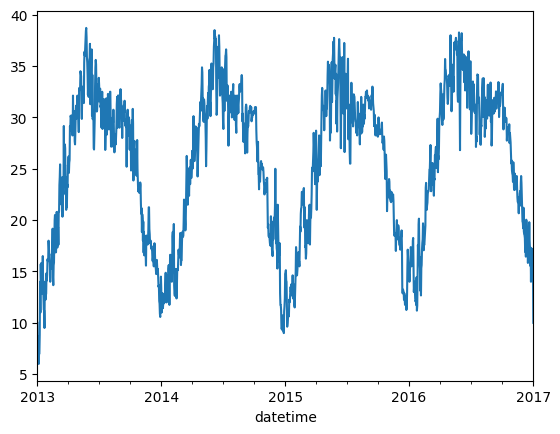

In [ ]:
ax = ts.plot();

## Figure Sizes for Time Series
- In general, when we are visualizing time series, we usually want a wider and shorter plot than we typically use.
- To see what is the default figsize used by matplotlib, we can check the values stored in the "rcParams" dictionary in pyplot.

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']

[6.4, 4.8]

The default figsize is 6" wide by 4" tall. Let's try something wider and shorter by setting the "figsize"

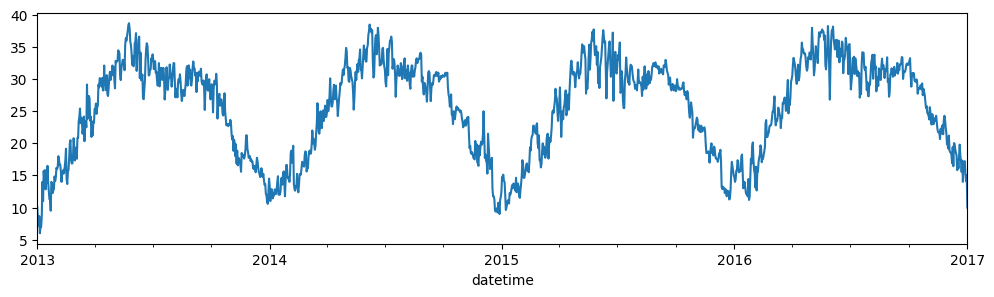

In [ ]:
## plot a 12x3 figure
ts.plot(figsize=(12,3));

- That looks much better! It would be tedious to constantly have to set the figsize for every visualization, so we can actually change the default figsize using plt.rcParams!
- All we have to do is set the figure.figsize param equal to the new (Width,Height) we want as our default.

In [ ]:
## setting the default figsize for this notebook
plt.rcParams['figure.figsize'] = (12,3)

Now try the basic plot again, and notice it is 12X3 without needing to specify the "figsize"

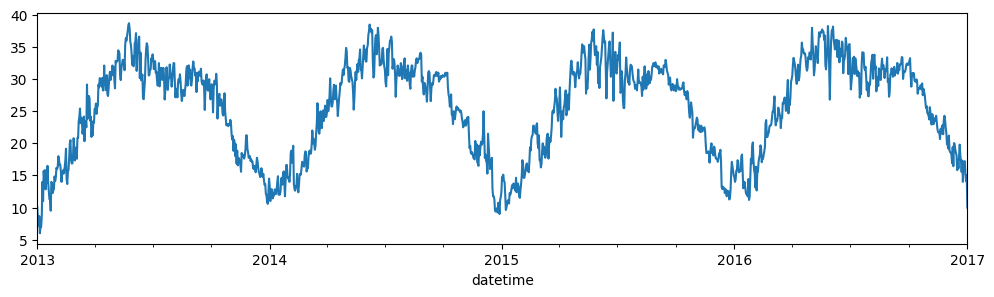

In [ ]:
ax = ts.plot();

## Plot - Style/ Level of Detail

If we just want to visualize the dates without the connecting lines, we can add style='.'

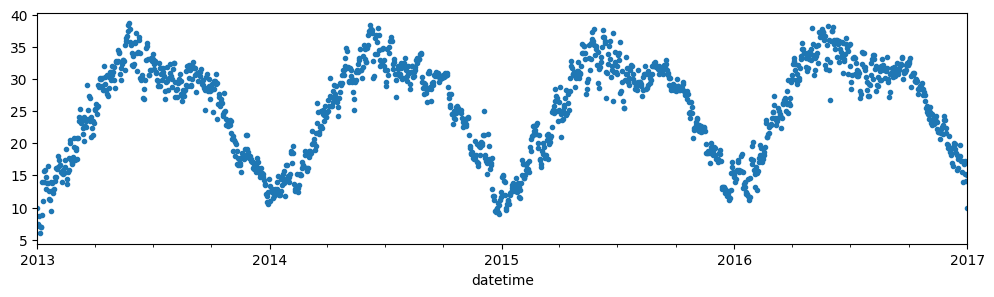

In [ ]:
## we can also visualize just the markers without the line
ax = ts.plot(style='.');

- We can also keep our line, but ADD markers as well either by:
  - Using a "style" arg for .plot that includes a valid marker (".","o", etc.) AND a line style.
    - e.g. ".-" or "o--" or "<-" etc.
    - See the marker documentation for other marker styles
    - Valid line styles are "-","--",":"
  - Use the marker argument and specify a valid marker symbol (see link above).

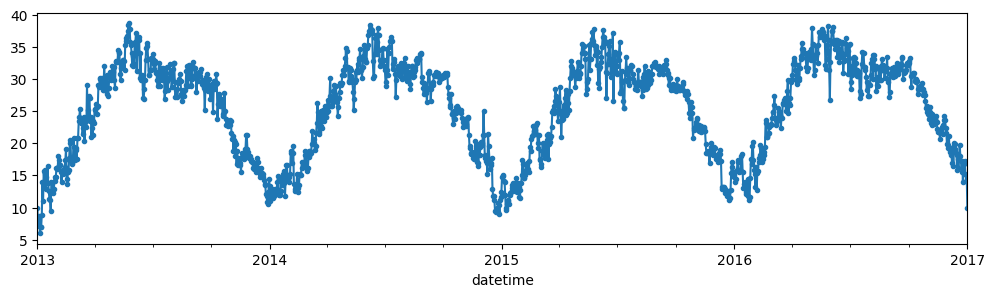

In [ ]:
## Using style to add markers
ax = ts.plot(style='.-')

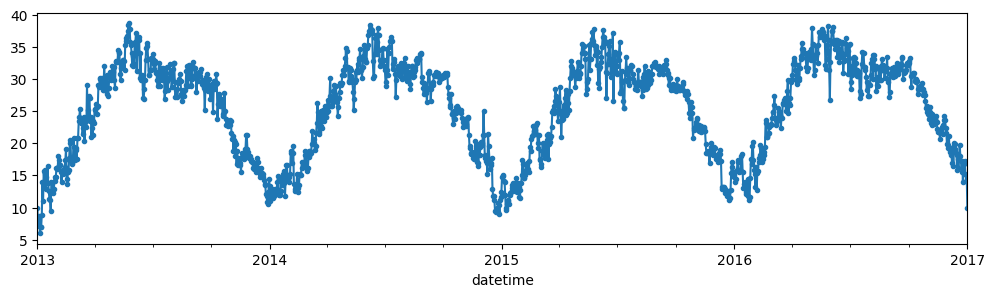

In [ ]:
## Using marker to add markers
ax = ts.plot(marker='.')

## Formatting Date Xticks

For more complex formatting, there are tools in matplotlib designed to allow us to customize the dates on our axis.

## Matplotlib's Artists

There are special classes in base matplotlib (not in matplotlib.pyplot) that are designed to update the spacing and text formatting of our x and y ticks.

- Tick-Formatting Artists:
  - For general use cases, these artists are located in matplotlib's ticker submodule.
  - Dates, however, have their own submodule called dates

In [ ]:
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

Each matplotlib axis can have both major and minor ticks.
Matplotlib uses 2 types of artists to control ticks:
a Locator which determines WHERE the ticks appear
and a Formatter which determines the format of the tick label's text.
The way we use these Artist objects is to:
Instantiate an appropriate Locator and/or Formatter
e.g.: locate_months = mdates.MonthLocator()
Apply your locator and/or formatter to the correct axis and types of ticks:
Start the line of code by slicing out the axis you want to customize from your Axis. (e.g. ax.xaxis or ax.yaxis)
Then chain on the "set_major_locator"/"set_major_formatter" to customize the major ticks. e.g. ax.xaxis.set_major_locator(locate_months).
These formatters won't apply rotation or changes to the text alignment, so we will do that after updating our ticks using the ax.set_xticklabels() method.
We will demonstrate how these tools work.

In [ ]:
## creating our tick locators and formatters
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
# create the formatter to display 3-letter month names + 2-digit year
fmt_months = mdates.DateFormatter("%B-%y")

Now that we have defined our locator and formatter, lets use these to produce our visual.

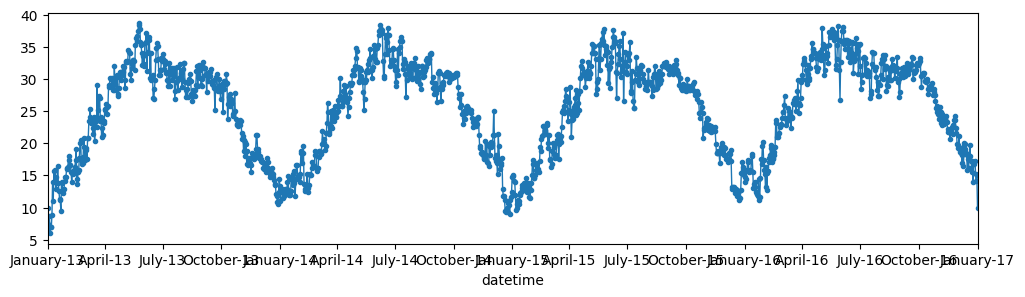

In [ ]:
## Plot the time series with pandas
## Adding . markers and a thinner line
ax = ts.plot(marker='.',lw=1);
ax.xaxis.set_major_locator(loc_3months)
ax.xaxis.set_major_formatter(fmt_months)

## Fixing Overlapping Labels

- For simple date label formatting, we can take advantage of the matplotlib Figure method: fig.autofmt_xdate()
- However, this requires that we have the figure itself. When starting a visualization with Pandas, we only receive the Axis.
- Three ways to get the Figure:
  - Use ax.get_figure():
If you already have the axis.
  - Use plt.gcf() #get current figure:
If you do not have the axis and are running the cell that creates the figure.
  - Make the fig and ax first and then use fig, ax = plt.subplots() followed by ts.plot(ax=ax)


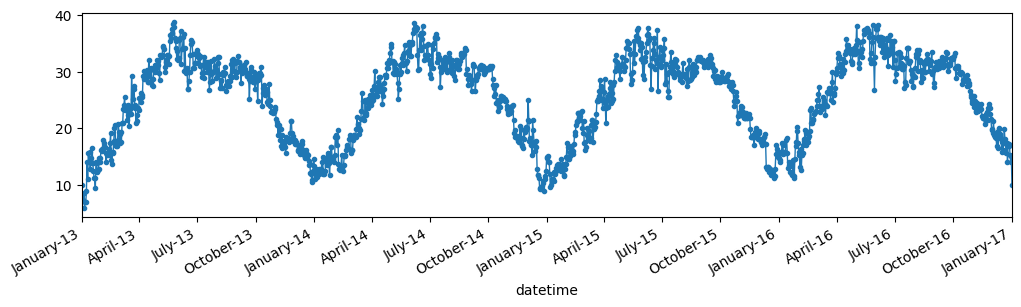

In [ ]:
##  Plot the time series with pandas
ax = ts.plot(marker='.',lw=1);
ax.xaxis.set_major_locator(loc_3months)
ax.xaxis.set_major_formatter(fmt_months)
##  Using ax.get_figure()
fig = ax.get_figure()
fig.autofmt_xdate()

## Customizing Our Ticks (advanced)
- The figure above now displays the month, but it's harder to visually see the years.
- To fix this, we will apply 2 locators/formatters:
  - One for the major ticks
  - One for the minor ticks
- For the figure above, we would like to:
  - Place minor ticks at every 3 months
  - Label minor ticks with 3-letter month names
  - Place major ticks at every year.
  - Label years with 4-digit years.
  - Make the grid lines for years darker than the grid lines for months.

In [ ]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

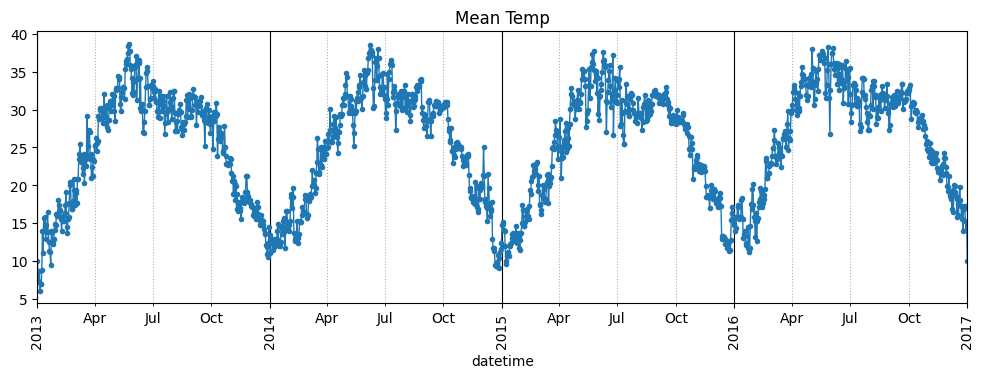

In [ ]:
## Make the fig and axis first
# plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp',marker='.',lw=1)
## customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
## customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

## Some Additional Customizations

### Increasing Font Size of Major Tick Labels
- Finally, we are going to change the formatting of our major xticklabels to use a large fontsize and bold fontweight.

<ipython-input-43-a8059c1f7792>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )


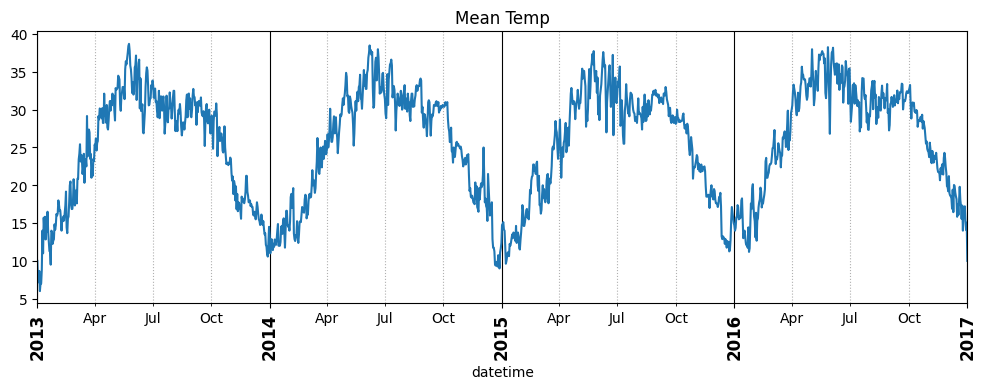

In [ ]:
##  Make the fig and axis first
#  plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp');
##  saving current xticks
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )
##  customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
##  Making major/minor gridlines visually distince
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

- The warning message we receive is a bit of a red herring. There are some advanced scenarios where it may cause an issue, but for our use, we will likely not run into the problem.
- To make the warning disappear though, we can also set the xticks themselves when we set the xticklabels.

*NOTE: when combining tick formatters/locators & ax.set_xticklabels(): - you need to use ax.set_xticklabels() before applying the formatters, or you may lose your labels!*

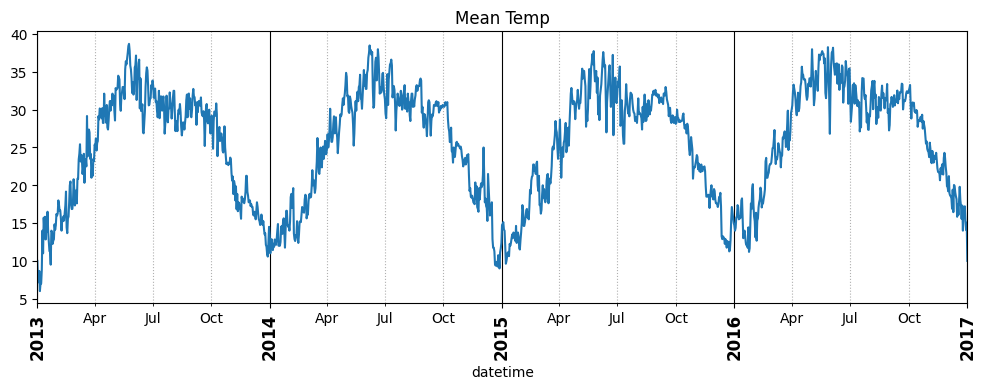

In [ ]:
##  Make the fig and axis first
#  plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp');
##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )
##  customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
##  Making major/minor gridlines visually distince
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

# Overhauling Matplotlib Defaults

## Temporarily using a context with sns.plotting_context
- If you only want to temporarily change the context settings, we can use sns.plotting_context (documentation).
We use the word "with" to temporarily apply the settings, just like when we temporarily opened local files.
- Example:
- We are going to first explore some options using the temporary sns.plotting_context. Once we have decided on our final format, we will use sns.set_context.
*Note that this is using the custom function (plot_dates) we created in an earlier lesson!*

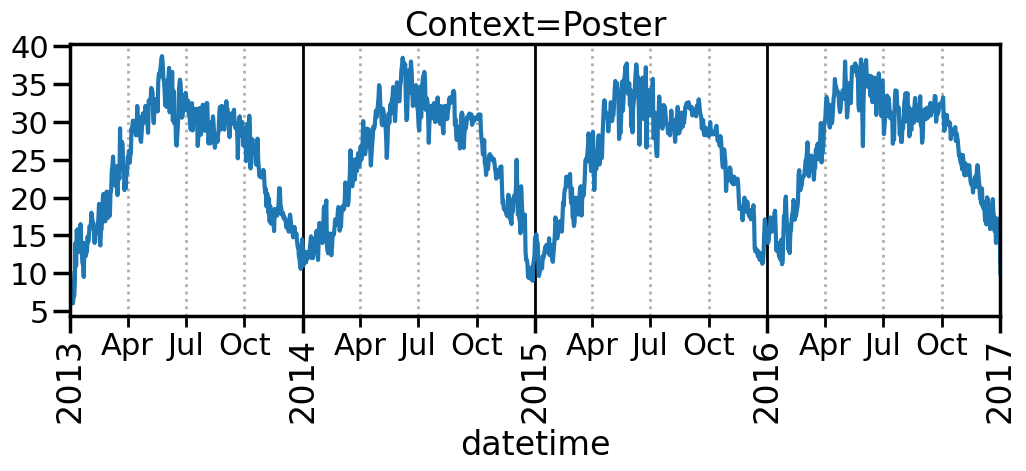

In [ ]:
import seaborn as sns
with sns.plotting_context('poster'):
    fig,ax = plot_dates(ts,xtick_fontsize=None,xtick_fontweight=None,title="Context=Poster")

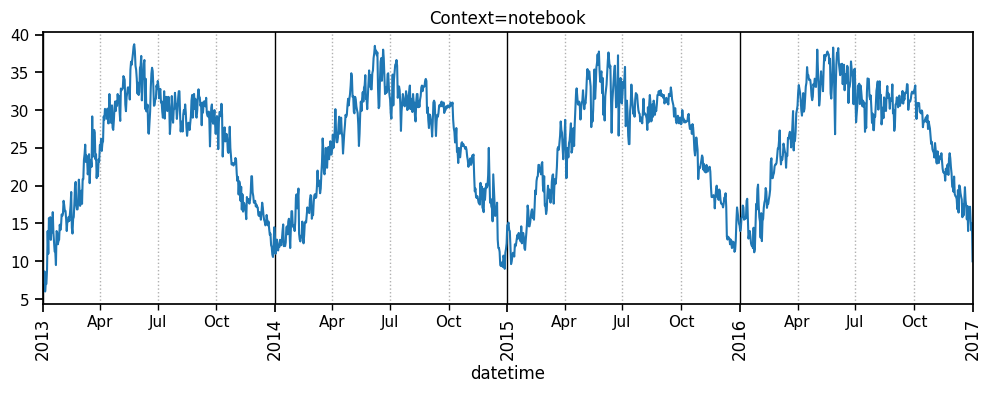

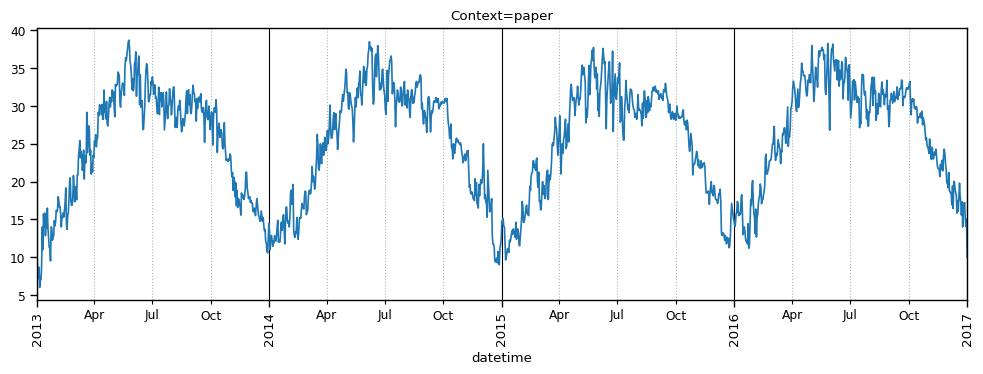

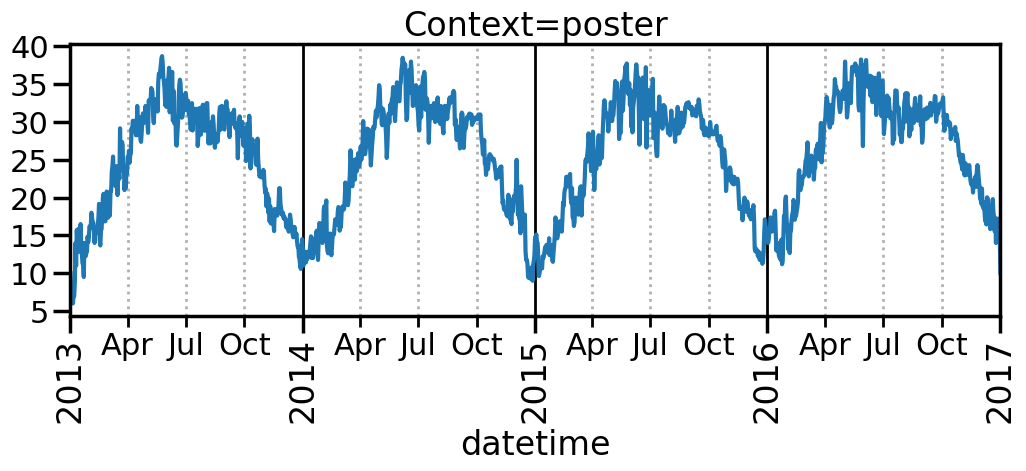

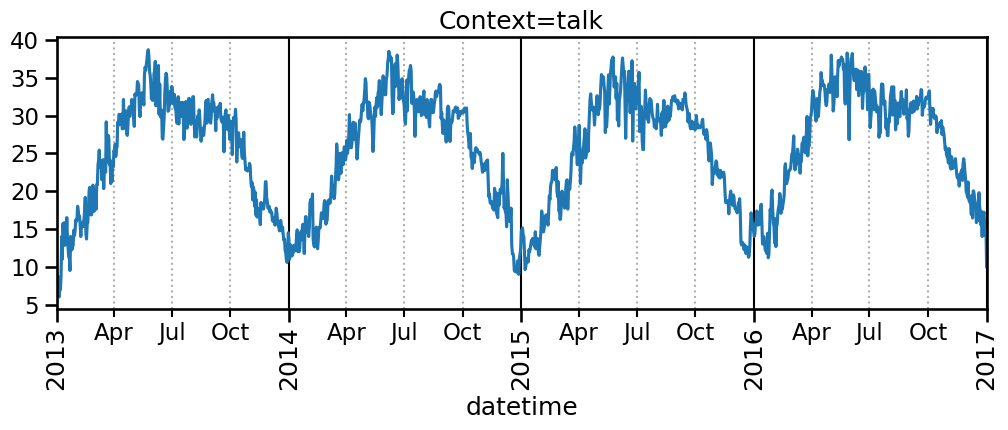

In [ ]:
## temporarily changing context
for context in ['notebook','paper','poster','talk']:
    with sns.plotting_context(context):
        fig,ax = plot_dates(ts,xtick_fontsize=None,xtick_fontweight=None,
                            title=f"Context={context}")

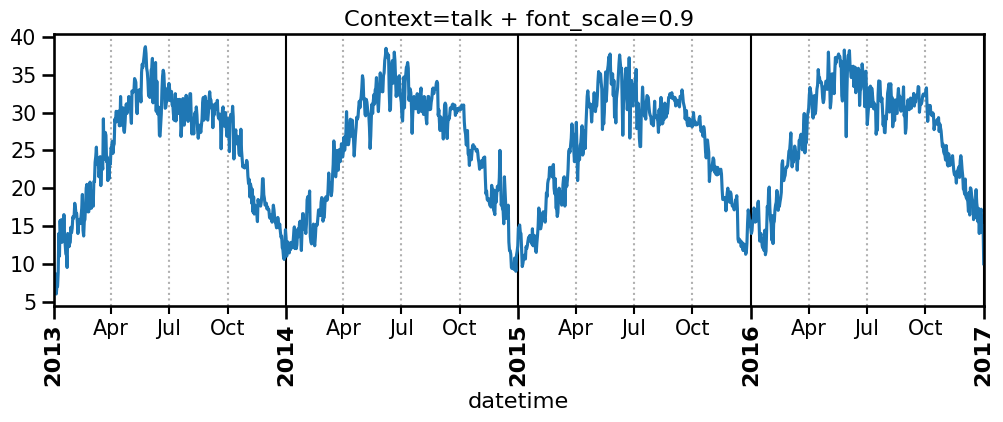

In [ ]:
with sns.plotting_context("talk", font_scale=0.9):
    fig,ax = plot_dates(ts,xtick_fontsize=None,
                        xtick_fontweight="bold",
                        title=f"Context=talk + font_scale=0.9")

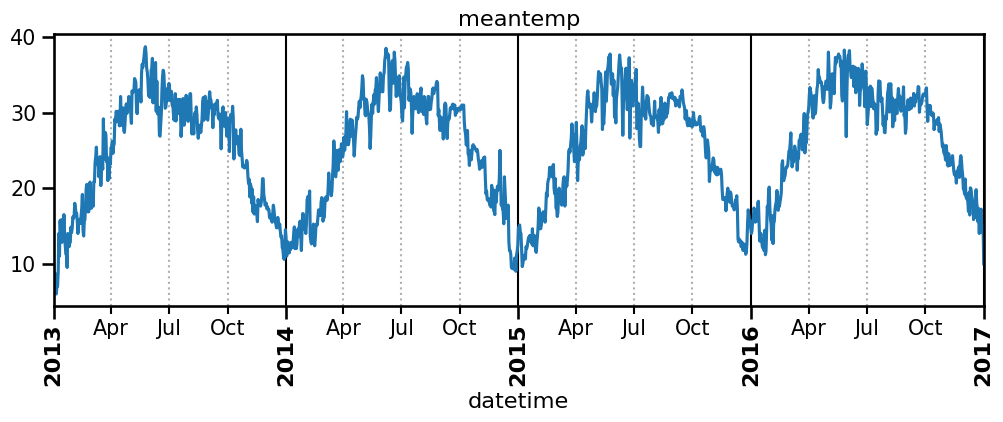

In [ ]:
## making the settings permanent for the notebook:
sns.set_context("talk", font_scale=0.9)
fig,ax = plot_dates(ts,xtick_fontsize=None,
                    xtick_fontweight="bold")

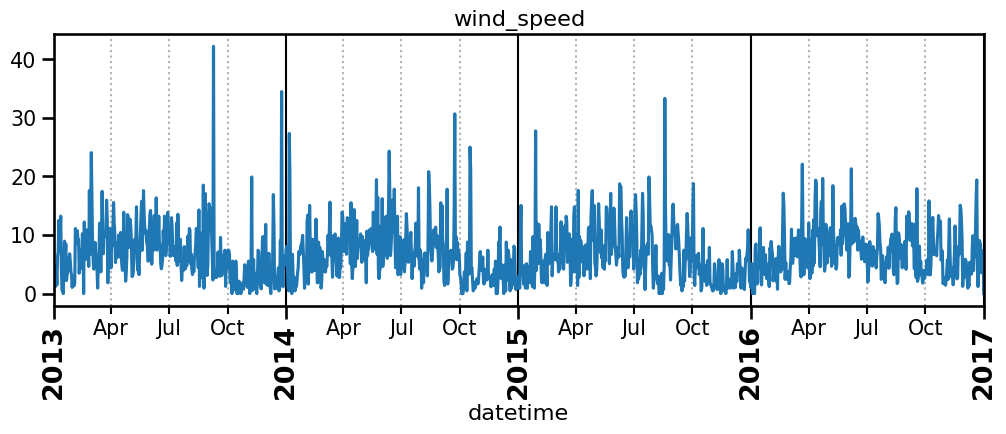

In [ ]:
##  Visualize wind_speed instead of meantemp
ts = df['wind_speed'].copy()
plot_dates(ts);

# Resampling and Imputation

## Converting Time Series Frequencies - the Right Way

In [ ]:
ts.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq=None)

## Setting the Frequency

## Setting the Frequency

In [ ]:
##  set daily frequency
ts = ts.asfreq('D')
##  preview the index again
ts.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq='D')

- We can see that the frequency for our index is now "D" for daily. Great!
- But what if we tried to use a different frequency that did not match our data?
Let's try using the hourly frequency and see what happens:


In [ ]:
#  remake ts
ts = df['wind_speed'].copy()
ts.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq=None)

In [ ]:
##  try making daily data into an hourly frequency
ts_H = ts.asfreq("H")
ts_H

datetime
2013-01-01 00:00:00    0.0
2013-01-01 01:00:00    NaN
2013-01-01 02:00:00    NaN
2013-01-01 03:00:00    NaN
2013-01-01 04:00:00    NaN
                      ... 
2016-12-31 20:00:00    NaN
2016-12-31 21:00:00    NaN
2016-12-31 22:00:00    NaN
2016-12-31 23:00:00    NaN
2017-01-01 00:00:00    0.0
Freq: H, Name: wind_speed, Length: 35065, dtype: float64

In [ ]:
# Let's try to convert our daily data to Monthly (MS) to include the first day of every month:
ts_MS = ts.asfreq("MS")
ts_MS.name = "asfreq"
ts_MS.head()

datetime
2013-01-01     0.000000
2013-02-01     2.220000
2013-03-01    24.066667
2013-04-01     4.400000
2013-05-01    12.685714
Freq: MS, Name: asfreq, dtype: float64

It seemed to work! BUT...it just removed every row that did not fall on the first of the month! That is a lot of data to just completely drop!
For reference, here is the plot of our first-of-the-month data (where all other values were dropped)

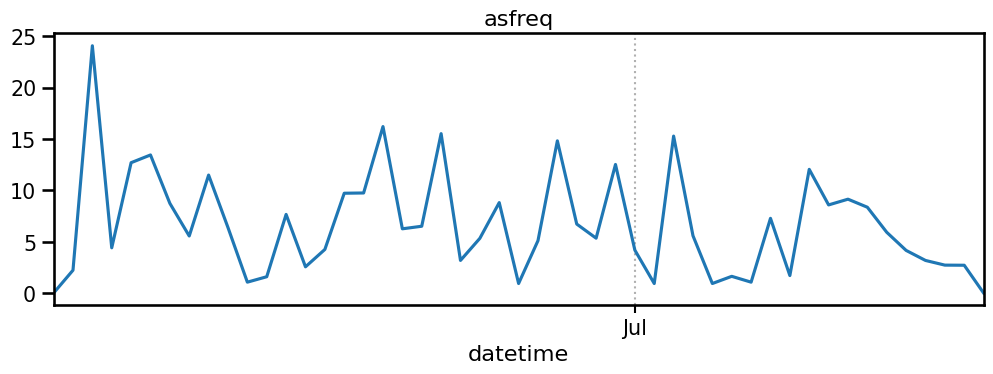

In [ ]:
plot_dates(ts_MS);

## Resampling (Upsampling/Downsampling)

df.resample() works similarly to df.groupby().
It prepares data to be aggregated, but it doesn't actually produce any data until we add an aggregation method.
E.g. .mean(), .sum(),.min(), etc

### Downsampling

In [ ]:
ts_MS_res = ts.resample("MS").mean()
ts_MS_res.name = 'Resampled'
ts_MS_res.head()

datetime
2013-01-01    4.833913
2013-02-01    7.474090
2013-03-01    8.757270
2013-04-01    8.046385
2013-05-01    8.943452
Freq: MS, Name: Resampled, dtype: float64

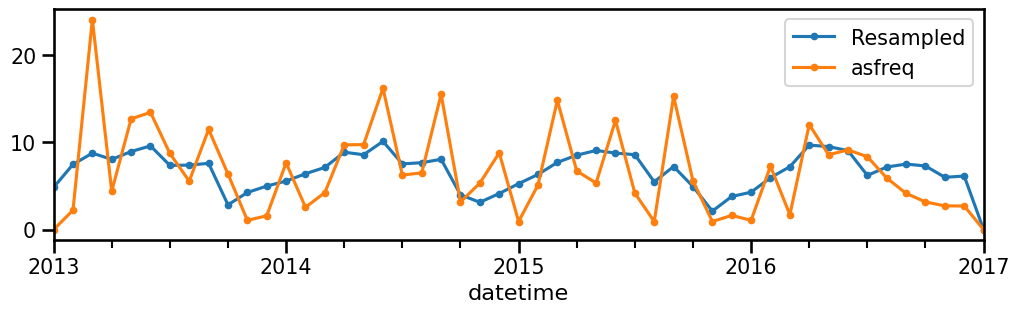

In [ ]:
# To further highlight the difference, here is a plot of the non-resampled and resampled data:
ax = ts_MS_res.plot(style='.-')
ts_MS.plot(style='.-',ax=ax)
ax.legend();

Wow... look at how different the asfreq vs .resample().mean() time series are! The asfreq one is way more jagged and is a less accurate summary of the wind speed during this time period.

## Use .agg() to Resample Time Series with Multiple Columns using Different Aggregation Methods

- Revisiting the entire dataframe for aggregation.
- When working with an entire dataframe as time series, there are some additional complexities/considerations.
- For example, what if we wanted to get our daily data as week frequency BUT: for each feature, we want a different aggregation method?
- Specifically,
  - meantemp: mean
  - humidity: max
  - wind_speed: max
  - meanpressure: mean
- We can create a dictionary of each feature and the aggregation method we wish to apply to it. Then we ca use .agg() with resample and include our dictionary within the parentheses.

In [ ]:
df_ts = df.drop(columns=['date'])
agg_dictionary = {'meantemp':'mean', 'humidity':'max', 'wind_speed':'max','meanpressure':'mean'}
df_W = df_ts.resample("W").agg(agg_dictionary)
df_W

,meantemp,humidity,wind_speed,meanpressure
datetime,,,,
2013-01-06,7.705556,92.000000,4.633333,1017.300000
2013-01-13,12.343537,78.600000,13.228571,1016.632653
2013-01-20,13.642857,92.166667,8.950000,1017.139456
2013-01-27,12.329592,79.666667,6.800000,1020.337075
2013-02-03,15.736905,77.571429,3.700000,1017.020578
...,...,...,...,...
2016-12-04,20.428841,84.000000,9.185714,873.901783
2016-12-11,18.318229,82.833333,5.355556,1015.619483
2016-12-18,17.871140,64.541667,9.879167,1016.727185


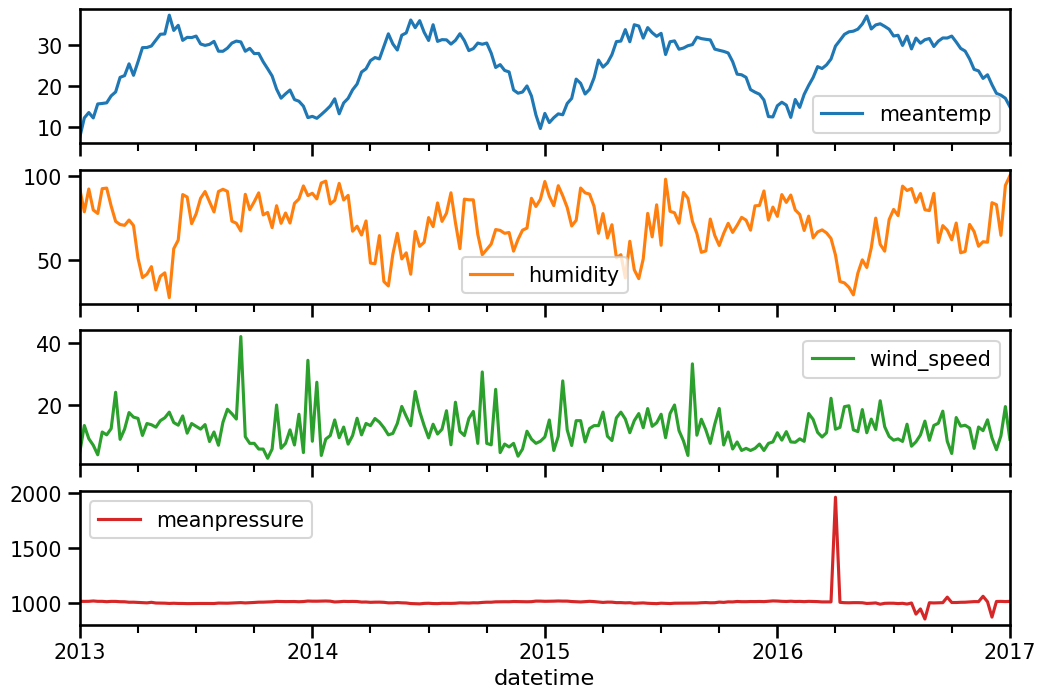

In [ ]:
df_W.plot(figsize=(12,8),subplots=True);

### Upsampling

Now let's try to resample our Daily data as an hourly (H) mean.

In [ ]:
ts_H = ts.resample("H").mean()
ts_H.name = 'Resampled'
ts_H.head()

datetime
2013-01-01 00:00:00    0.0
2013-01-01 01:00:00    NaN
2013-01-01 02:00:00    NaN
2013-01-01 03:00:00    NaN
2013-01-01 04:00:00    NaN
Freq: H, Name: Resampled, dtype: float64

<Axes: xlabel='datetime'>

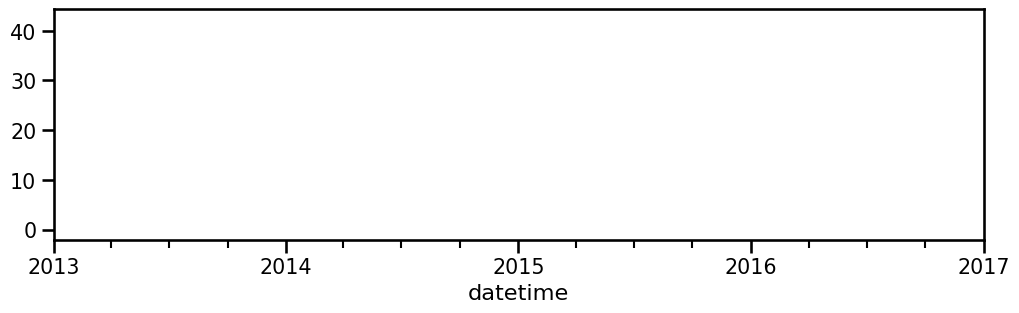

In [ ]:
# Recall that when we upsample, we are trying to add more data points...But the data is not available!
ts_H.plot()

## Handling Null Values

In [ ]:
ts = df['wind_speed'].copy()
ts

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    3.700000
                ...   
2016-12-28    3.547826
2016-12-29    6.000000
2016-12-30    6.266667
2016-12-31    7.325000
2017-01-01    0.000000
Name: wind_speed, Length: 1462, dtype: float64

In [ ]:
day_of_week = ts.index.day_name()
day_of_week.value_counts()

Tuesday      209
Wednesday    209
Thursday     209
Friday       209
Saturday     209
Sunday       209
Monday       208
Name: datetime, dtype: int64

In [ ]:
##  removing all sundays and saturdays
ts = ts[ ~day_of_week.isin(['Sunday','Saturday']) ]
ts.index.day_name().value_counts()

Tuesday      209
Wednesday    209
Thursday     209
Friday       209
Monday       208
Name: datetime, dtype: int64

In [ ]:
# Since the rest of our rows are already daily, and we do not want to aggregate the data, we can use .asfreq("D").
ts_D = ts.asfreq("D")
ts_D.head(10)

datetime
2013-01-01     0.000000
2013-01-02     2.980000
2013-01-03     4.633333
2013-01-04     1.233333
2013-01-05          NaN
2013-01-06          NaN
2013-01-07     6.300000
2013-01-08     7.142857
2013-01-09    12.500000
2013-01-10     7.400000
Freq: D, Name: wind_speed, dtype: float64

In [ ]:
# count the missing values
ts_D.isna().sum()

416

## Methods for Imputing Null Values with Time Series

Our options for filling null values with time series are different than our usual imputation methods. We wouldn't want to use the mean or median or most frequent values since those are calculated using the entire feature.

- Instead, we will explore the following options:
  - forward-filling: fill in null values using the last valid value that occurred PRIOR to the missing value.
  - back-filling: fill in null values with the next valid value that occurs AFTER the missing value.
  - interpolation: fill in null values by calculating the midpoint between the previous valid value and the next valid value.
- The first 2 options can be done by using ts.resample("D").fillna() and specifying the method argument:
  - "bfill"
  - "ffill"
- Interpolation can be applied by using the .interpolate() method after the .resample() instead of .fillna().

To help you visualize what is happening, we are going to work with just 1 week of our data set. We will slice out the first week here as our example:

In [ ]:
##  saving 1 week of values to use for demonstration
example = ts_D.loc['2013-01-01':'2013-01-08']
example

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05         NaN
2013-01-06         NaN
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64

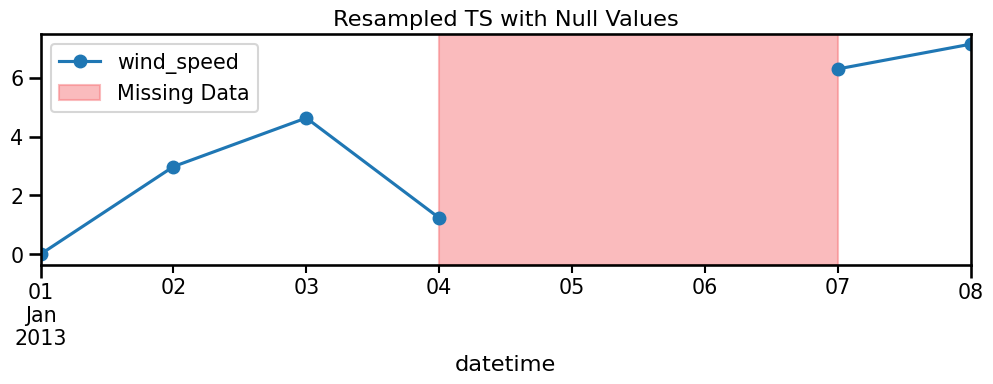

In [ ]:
##  Plotting the missing data
ax = example.plot(style='o-', title='Resampled TS with Null Values',)
##  Annotating region with null values to impute
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

### Forward-Fill

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    1.233333
2013-01-06    1.233333
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64


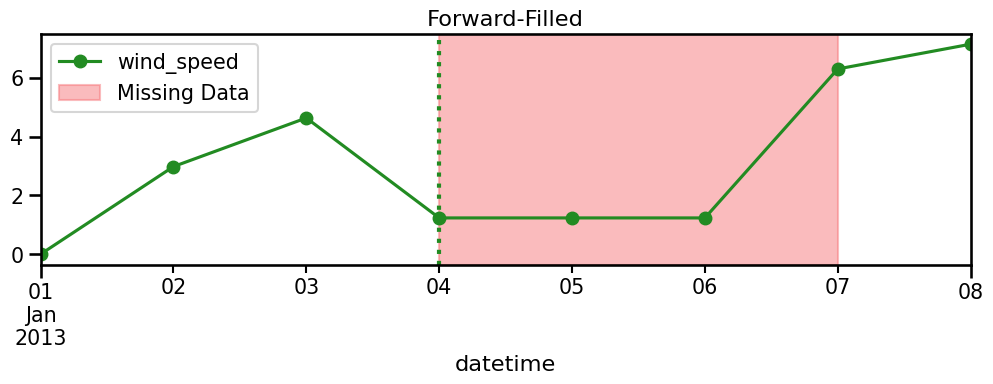

In [ ]:
ts_ffill = example.fillna(method='ffill')
print(ts_ffill)
ax = ts_ffill.plot(style='o-',title='Forward-Filled', color='forestgreen');
ax.axvline('01-04-2013',color='forestgreen',lw=3, ls=':')
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

Is this what you expected? We can see that ffill took the value from Friday, 01/04/2013 (1.23333) and used that value to fill in the missing values for Saturday and Sunday.

### Backward Fill

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    6.300000
2013-01-06    6.300000
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64


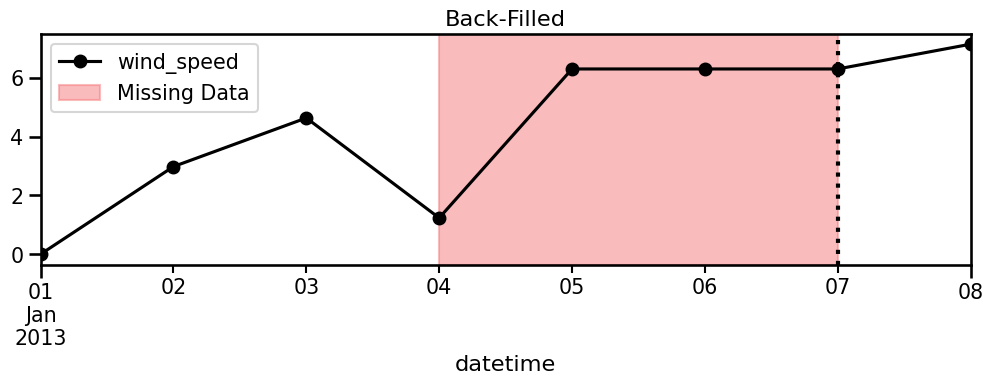

In [ ]:
ts_bfill = example.fillna(method='bfill')
print(ts_bfill)
ax = ts_bfill.plot(style='o-',title='Back-Filled',color='k');
ax.axvline("01-07-2013",color='k',lw=3, ls=':')
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

We can see that bfill took the value from the following Monday (6.30000) and filled that in for the missing values for Saturday and Sunday.

### Interpolate

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    2.922222
2013-01-06    4.611111
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64


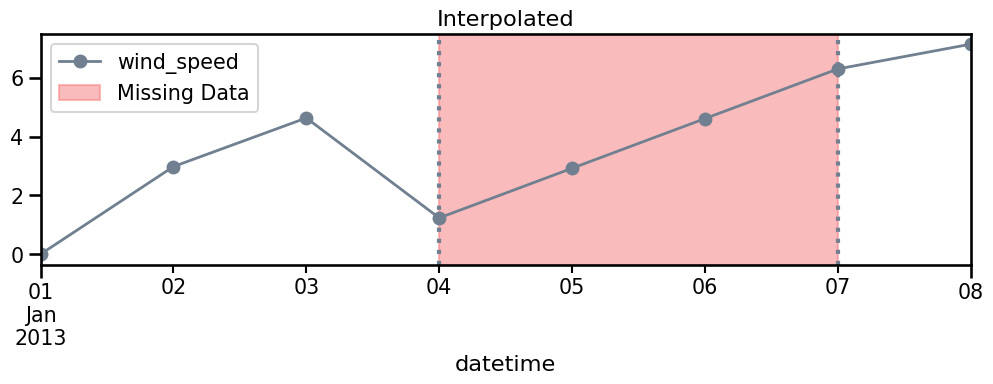

In [ ]:
ts_interp = example.interpolate()
print(ts_interp)
ax = ts_interp.plot(style='o-', color='slategray', lw=2,title='Interpolated');
##  annotating start and end values used by interpolate
ax.axvline('01-04-2013', color='slategray',ls=':',lw=3)
ax.axvline('01-07-2013', color='slategray',ls=':',lw=3)
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

## Comparison of Imputation Methods

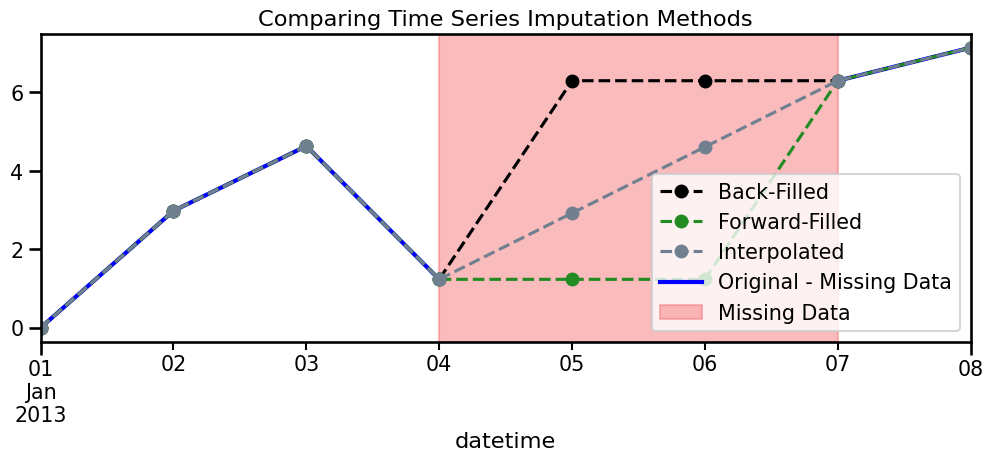

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Comparing Time Series Imputation Methods')
ts_bfill.plot(style='o--',label='Back-Filled',ax=ax, color='k');
ts_ffill.plot(style='o--',label='Forward-Filled',ax=ax, color='forestgreen');
ts_interp.plot(style='o--',label='Interpolated', ax=ax,color='slategray' );
example.plot(style='-', label='Original - Missing Data',ax=ax, color='blue',             lw=3,zorder=-1)
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d',            alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

## Moving the legend outside the plot

When using ax.legend(), you can give it the anchor point for the top-right corner of the plot by using the bbox_to_anchor argument and providing 2-number coordinates.
- Coordinates: from 0 to 1 representing where 0 is the very left/bottom corner of the figure and 1 is the very top right

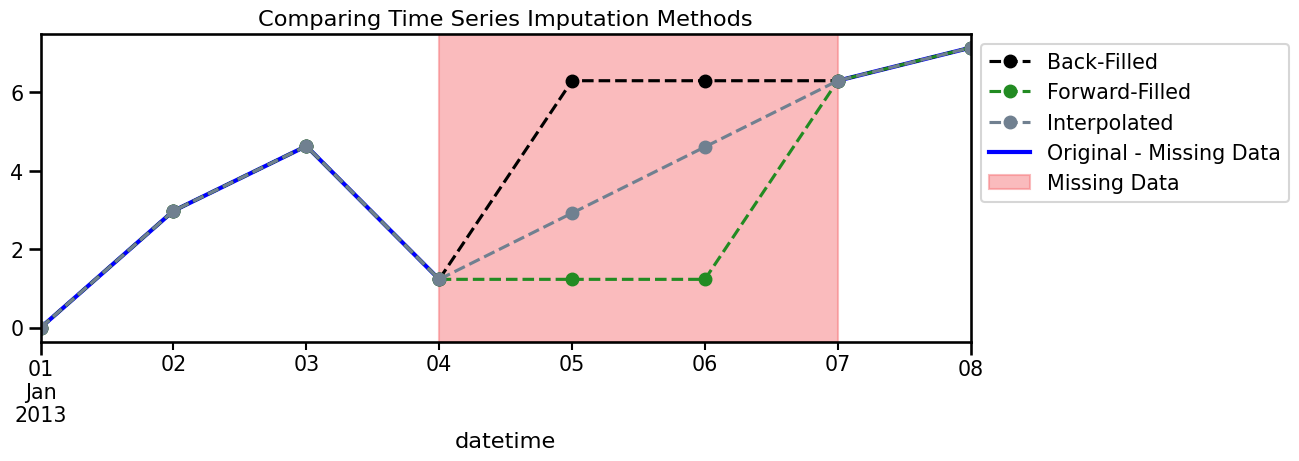

In [ ]:
# move legend to outside of plot on right side
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Comparing Time Series Imputation Methods')
ts_bfill.plot(style='o--',label='Back-Filled',ax=ax, color='k');
ts_ffill.plot(style='o--',label='Forward-Filled',ax=ax, color='forestgreen');
ts_interp.plot(style='o--',label='Interpolated', ax=ax,color='slategray' );
example.plot(style='-', label='Original - Missing Data',ax=ax, color='blue', lw=3,zorder=-1)
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend(bbox_to_anchor=[1,1]);

**Which imputation method should I choose?**

First, note that all of the methods here assume that the values close to the missing value are similar (which may or may not be the case). There are also many advanced techniques for imputations, some of which we will discuss in a future lesson after exploring statistics with time series. In general, interpolating is a good method to start with unless you have reason to believe a forward or back fill method would be a better representation of your missing values.

## Creating a Function for your Code

Once you have decided on a style that you like, you can work more efficiently by defining your plot formats and styles within a function. Take some time to read this function! Do you understand it? Think about how you could modify this function to achieve different results!

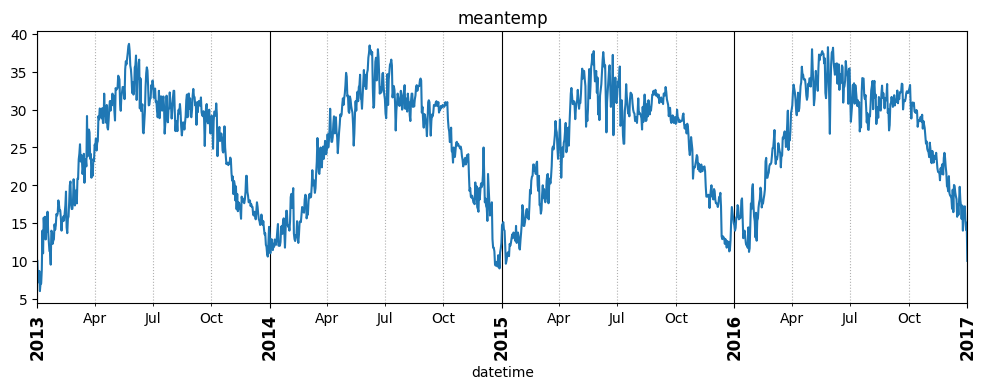

In [ ]:
## we've done enough customization that it makes sense to bundle this in a function
def plot_dates(ts,figsize=(12,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None):## Make the fig and axis first

    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);

    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")

    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(),
                       fontsize=xtick_fontsize,
                       fontweight=xtick_fontweight)

    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax
plot_dates(ts);

# Custom Formats and Errors

In [ ]:
demo = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv', usecols=[0,1])
demo.info()
demo

In [ ]:
pd.to_datetime(demo['date'])

- Pandas was confused and tried to interpret the integer dates as Unix times.
- Unix times are a way of expressing date and time with just numbers. However, the earliest possible unix date is January 01, 1970.
- As you can see above, it assigned the date of 1970-01-01 to every date. And then used the integer date as the number of milliseconds AFTER 12:00AM on 01/01/1970.

The main thing to notice here is: This is not what we wanted!! It is essential that you check the results of anything you ask Python to do to make sure it is working how you expect it to! If not, you need to investigate further and figure out what the issue is.

In this case, python needs a little help from us humans! Let's examine our original date format and see if we can decipher it!

In [ ]:
## displaying random sample
demo['date'].sample(n=10).sort_index()

- It looks like we have 4-digit years (%Y), followed by the 2-digit month (%m) followed by 2-digit day (%d).
- Once we identify the format of our original column, we can create the format string that Pandas will need to properly parse these dates.
- The combined format code to use is "%Y%m%d". Let's try using this as the format argument for to_datetime:

In [ ]:
pd.to_datetime(demo['date'], format='%Y%m%d')

That looks MUCH better. Remember, when pd.to_datetime doesn't return what you would expect, you will need to figure out the format code that is appropriate for your current date formatting.

## Handling pd.to_datetime Errors

We will use another dataset for this demonstration

- We will be working with crime data taken directly from the city of Baltimore via Baltimore's Open Data website: https://data.baltimorecity.gov/search?q=crime data
  - The exact data we want is "Part 1 Crime Data"
  - It is large file and will take some time to download.

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ4lekzpYpo0pA9h1d3KYObIb3lQtAqz289c7jpwckioXvxm4xykz6ZSJpnDwjKTxJ4iqpG0seNJdSZ/pub?gidass=>=312387697&single=true&output=csv"
demo = pd.read_csv(url)
demo.head(3)

In [ ]:
# This will give an error
pd.to_datetime(demo['CrimeDateTime'])

In [ ]:
try:
        display(pd.to_datetime(demo['CrimeDateTime']))
except Exception as e:
        print(e)

- Sometimes there may be some "bad" values that are not compatible with the other dates in the column.
- In this case, we can leverage the "errors" argument of pd.to_datetime.
- According to to the docstring for pd.to_datetime:


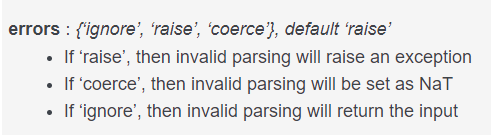

We can see that if we use errors='coerce', it will replace incompatible values will NaT (Not a Time).

In [ ]:
demo['CrimeDateTime'] = pd.to_datetime(demo['CrimeDateTime'], errors='coerce')
demo['CrimeDateTime'].isna().sum()

Make sure to drop or impute any null values for time. In this case we will just drop the one value.

In [ ]:
demo = demo.dropna(subset=['CrimeDateTime'])
demo.head()

In [ ]:
# Now that we have dropped the data point that was causing our error, we can try again:
pd.to_datetime(demo['CrimeDateTime'])

# Timedeltas & Date Ranges

We will return to our Delhi weather dataset and convert the 'date' feature to a datetime column.

In [ ]:
import pandas as pd
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQcpVvVioO23cndDwr1UmKhndrSq6ES6ZUKZ4fkBBqIAavd1_coVPO_yeOye-Ub-cAWlkX3psJvOU8o/pub?output=csv"
df = pd.read_csv(url)
df['datetime'] = pd.to_datetime(df['date'])

In [ ]:
# set 'datetime' as the index
df = df.set_index('datetime')

In [ ]:
# make the time delta of 3 days
delta_3d = pd.to_timedelta(3,'D')
delta_3d

In [ ]:
max_date = df['humidity'].idxmax()
# calc 3 days BEFORE
pre_max = max_date - delta_3d
pre_max

In [ ]:
# calc 3 days AFTER
post_max = max_date + delta_3d
post_max

Now that we have our pre and post dates, we can obtain average windspeed by setting those dates as the range and calculating the mean:

In [ ]:
mean_windspeed = df.loc[pre_max:post_max,'wind_speed'].mean()
mean_windspeed

## pd.date_range

Another option is to store our range of dates as a variable using pd.date_range.
pd.date_range Documentation

In [ ]:
## making a date range to cover the pre-max to post-max window
date_range = pd.date_range(pre_max, post_max)
date_range

Notice that we have a list of indices. When we attempt to run our calculation, we will get an error:

In [ ]:
# this will give an error
df.loc[date_range,'wind_speed'].mean()

Can you see what caused the error? It turns out that our date range goes beyond the index of our data.

This did not cause an error when just using .loc with our pre and post dates because using the range within .loc will just pull any dates that fall within the range, rather than a list of each date in the range.

The difference is subtle, but understanding your options and how each work will give you more versatility when writing code.